# Taller de manejo y visualización de series de tiempo. Sesión 1
El taller aborda los fundamentos para manejo de series de tiempo con Python. El objetivo es otorgar los conocimientos fundamentales al estudiante para el procesamiento, manejo y visualización de bases de datos con series de tiempo en Python. Los códigos de Python se escribirán y ejecutarán en Jupyter Notebook. Se brindará a los estudiantes con las bases de datos para que puedan ejecutar los códigos.

### Sesión: 1 - Martes 24 de octubre
### Hora: 4pm- 6pm
### Docente: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- <a href='#t1'>1. Introducción a las series de tiempo en Python</a>
     - <a href='#1.1.'>1.1. Datatime index</a> 
     - <a href='#1.2.'>1.2. Graficar una serie de tiempo</a>
     - <a href='#1.3.'>1.3. Limpiar tu serie de tiempo </a>
- <a href='#t2'>2. Customiza tu serie de tiempo</a>
     - <a href='#2.1.'>2.1. Haz un subset de la serie de tiempo </a>
     - <a href='#2.2.'>2.2. Añadir líneas en las gráficas  </a>
     - <a href='#2.3.'>2.3. Sombrear regiones en tu gráfica </a>  
     - <a href='#2.4.'>2.4. Agregar anotaciones </a>
- <a href='#t3'>3. Graficar agregados de los datos </a> 
     - <a href='#3.1.'>3.1. Graficar el rolling average</a>
     - <a href='#3.2.'>3.2. Graficar datos agregados por año</a>
- <a href='#t4'>4. Graficar estadísticas y sintetizar la información</a>
     - <a href='#4.1.'>4.1. Graficar boxplots (gráficos de caja)</a>
     - <a href='#4.2.'>4.2. Graficar histogramas</a>
     - <a href='#4.3.'>4.3. Crear gráficos de densidad </a>
- <a href='#t5'>5. Descomponer una serie de tiempo</a>
- <a href='#t6'>6. Graficar múltiples series de tiempo </a>



In [100]:
# Importamos algunas librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  <a id='t1'> 1. Introducción a las series de tiempo en Python</a>

## <a id='1.1.'> 1.1. Datatime index </a> 

In [101]:
co_2 = pd.read_csv('databases/co2_levels.csv')
co_2.head()

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [102]:
co_2.columns

Index(['datestamp', 'co2'], dtype='object')

In [4]:
# Vemos el dtype de las columnas
co_2.dtypes # el index es data type object

datestamp     object
co2          float64
dtype: object

In [103]:
co_2['datestamp'] = pd.to_datetime(co_2['datestamp'])

In [104]:
co_2.dtypes

datestamp    datetime64[ns]
co2                 float64
dtype: object

Las unidades de fecha son años ('Y'), meses ('M'), semanas ('W') y días ('D'), mientras que las unidades de tiempo son horas ('h'), minutos ('m'), segundos ('s'), milisegundos ('ms') y algunas unidades adicionales basadas en segundos con prefijo SI. 
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [107]:
co_2.head()

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [8]:
# lo descargamos a Excel
co_2.to_excel('co_2.xlsx')

In [106]:
# También podemos seleccionar el formato manualmente
co_2['datestamp'] = pd.to_datetime(co_2['datestamp'], format = '%Y-%m-%d')
#co_2['datestamp'] = pd.to_datetime(co_2['datestamp'], format = '%Y-%m-%d', errors = 'ignore')

In [108]:
# Fijemos datestamp como índice
co_2 = co_2.set_index('datestamp')

In [109]:
co_2.dtypes

co2    float64
dtype: object

In [110]:
co_2.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [111]:
co_2.index # es DateTimeIndex

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

## <a id='1.2.'> 1.2. Graficar una serie de tiempo </a>  


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

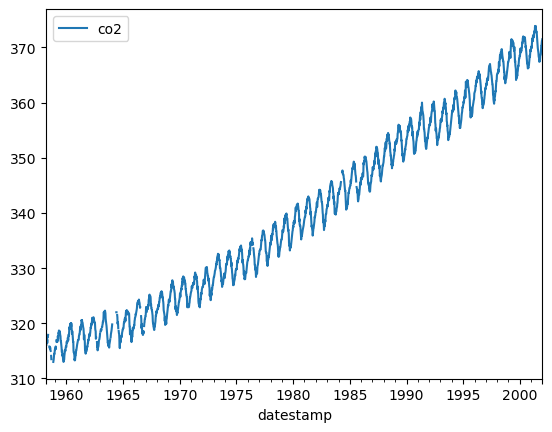

In [113]:
co_2.plot()

plt.show()

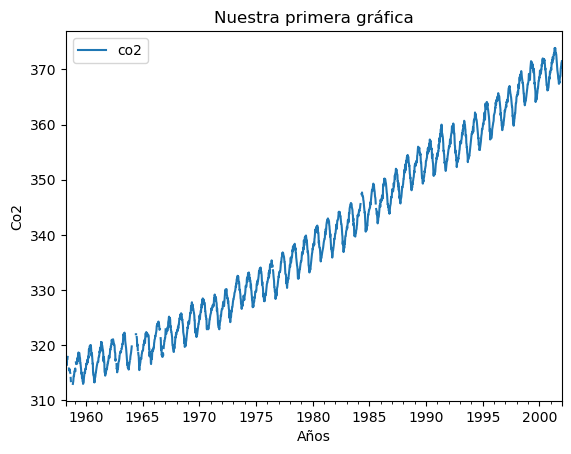

In [114]:
co_2.plot()

plt.xlabel('Años')

plt.ylabel('Co2')

plt.title('Nuestra primera gráfica')

plt.show()

Principales argumentos para plotear:
- **figsize:** tamaño del canva (largo x alto)
- **fontsize:** tamaño de la letra (también se puede especificar para el título o los ejes x e y)
- **linewidth:** grosor de la línea del plot
- **linestyle:** estilo de la línea (punteada, sólida, etc)
- **color:** color de la línea

Principales funciones:
- **set_xlabel:** Nombre del eje x
- **set_ylabel:** Nombre del eje y
- **set_title:** Título

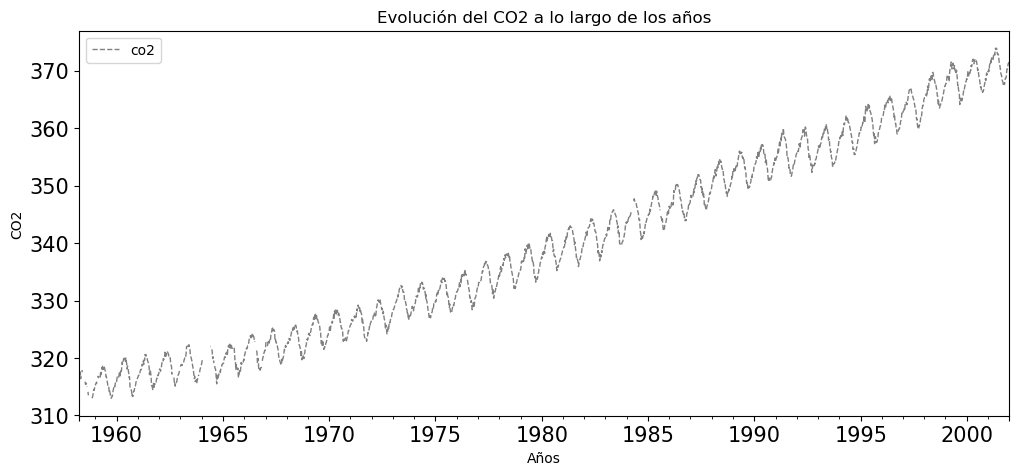

In [117]:
ax = co_2.plot(figsize = (12, 5), fontsize = 15, linewidth = 1, linestyle = '--', color = 'grey')

ax.set_xlabel('Años')

ax.set_ylabel('CO2')

ax.set_title('Evolución del CO2 a lo largo de los años')

plt.show()

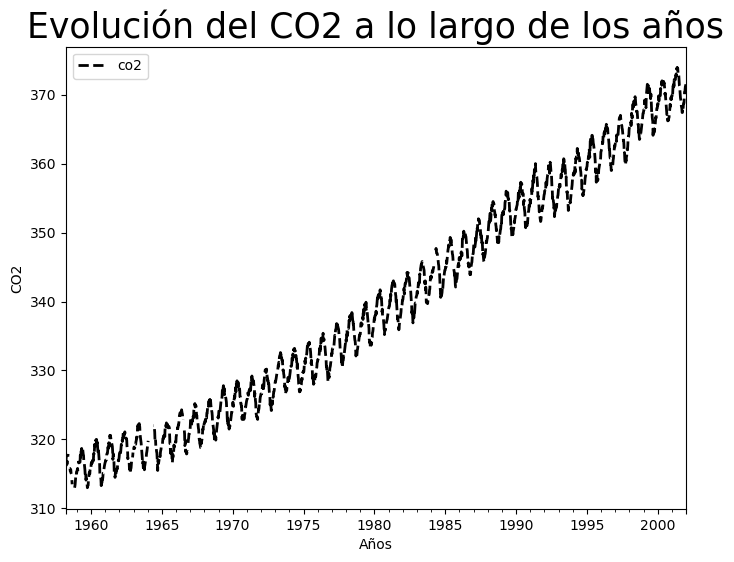

In [118]:
ax = co_2.plot(figsize = (8, 6), linewidth = 2, linestyle = '--', color = 'black')

ax.set_xlabel('Años', fontsize = 10)

ax.set_ylabel('CO2', fontsize = 10)

ax.set_title('Evolución del CO2 a lo largo de los años', fontsize = 25)

plt.show()

Otras funciones importantes: 
- **grid:** agregar un grid al fondo
- **tick_params:** ajustar el aspecto de los ticks, los ticks labels y los grids. Por ejemplo, el tamaño de los valores de los ejes o la rotación

Otros argumentos importantes:
- labelsize: el tamaño del tick
- rotation: permite que rote el tick
- grid_alpha: indica la transparencia del grid


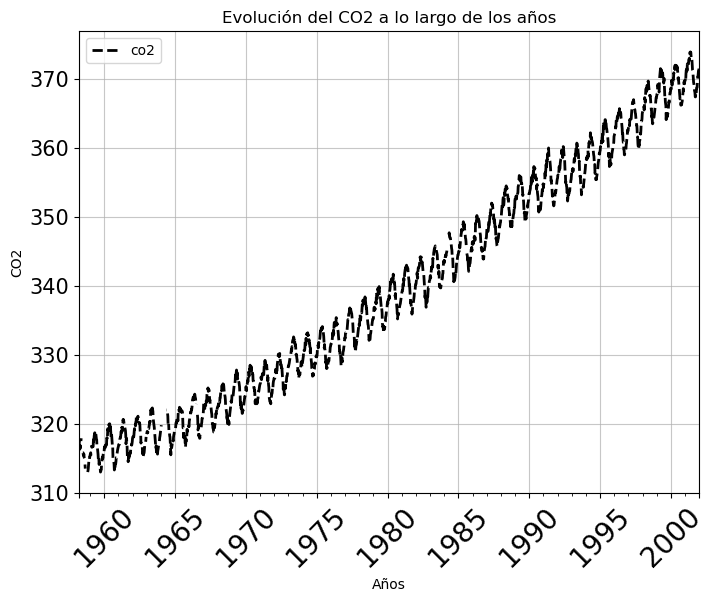

In [124]:
ax = co_2.plot(figsize = (8, 6), fontsize = 15, linewidth = 2, linestyle = '--', color = 'black')

ax.set_xlabel('Años', fontsize = 10)

ax.set_ylabel('CO2', fontsize = 10)

ax.set_title('Evolución del CO2 a lo largo de los años')

ax.grid(True)

ax.tick_params(axis='x', labelsize=20,  rotation = 45, grid_alpha = 0.7) 

ax.tick_params(axis='y', labelsize=15, grid_alpha = 0.7)

plt.show()

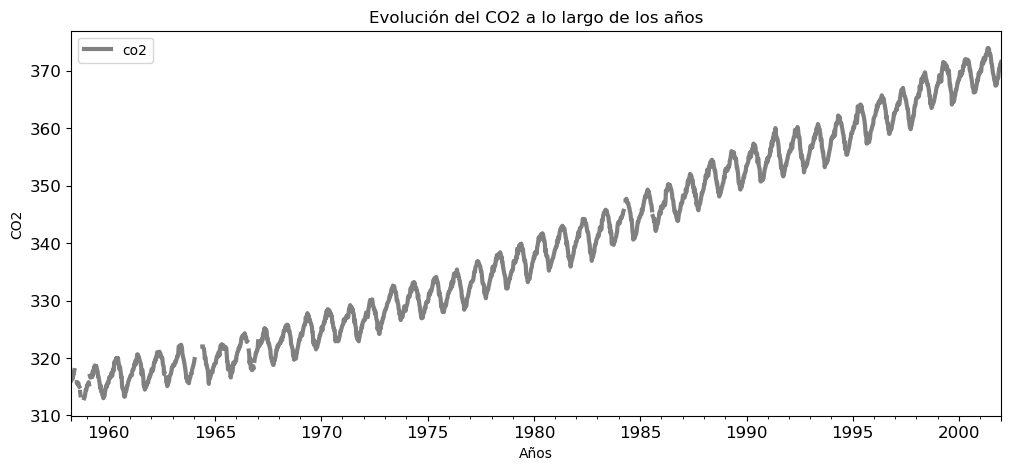

In [20]:
ax = co_2.plot(figsize = (12, 5), fontsize = 12, linewidth = 3, linestyle = '-', color = 'grey')

ax.set_xlabel('Años')

ax.set_ylabel('CO2')

ax.set_title('Evolución del CO2 a lo largo de los años')

plt.show()

Otra herramiento importante al gráficar: los estilos disponibles \
Se activan utilizando plt.style.use(' ')

In [21]:
print(plt.style.available) # Para ver todos los estilos disponibles por defecto en matplotlib.pyplot

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


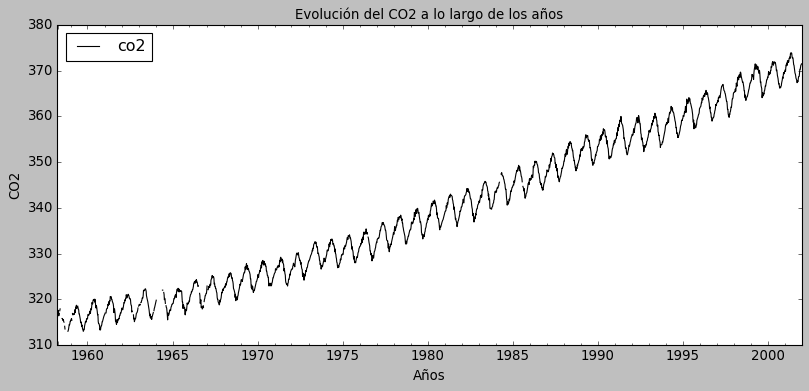

In [125]:
plt.style.use('classic')

ax = co_2.plot(figsize = (12, 5), linestyle = '-', color = 'black')

ax.set_xlabel('Años')
ax.set_ylabel('CO2')
ax.set_title('Evolución del CO2 a lo largo de los años', fontsize = 12)
plt.show()

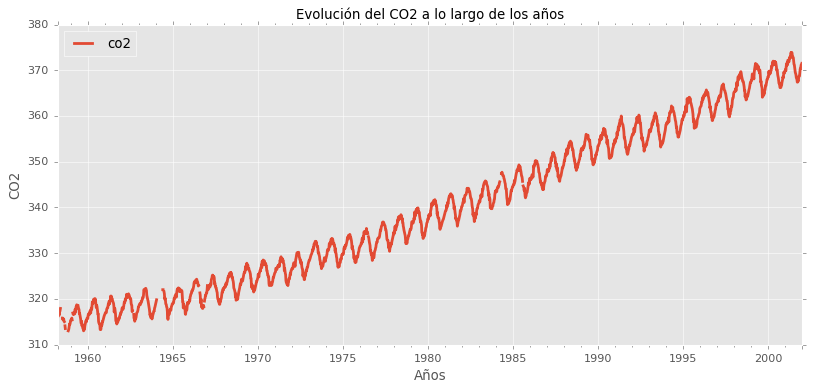

In [126]:
plt.style.use('ggplot') # Ahora luce como una gráfica de R

ax = co_2.plot(figsize = (12, 5), linewidth = 2.5)

ax.set_xlabel('Años')
ax.set_ylabel('CO2')
ax.set_title('Evolución del CO2 a lo largo de los años', fontsize = 12)
plt.show()

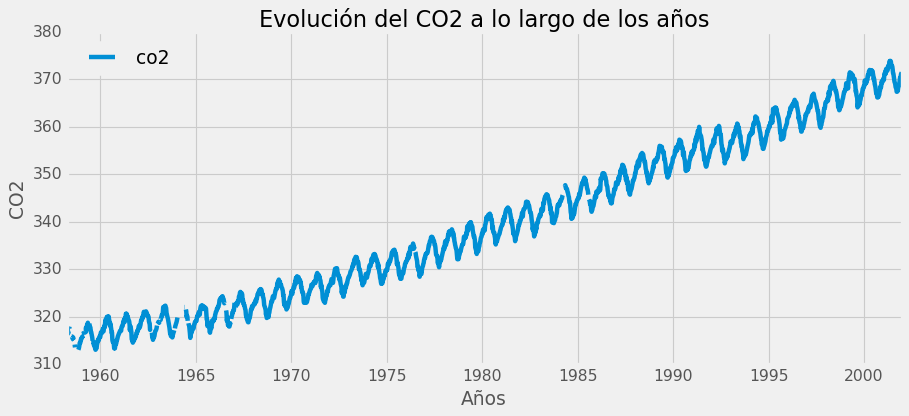

In [127]:
plt.style.use('fivethirtyeight') # típicamente usado para presentaciones

ax = co_2.plot(figsize = (12, 5))

ax.set_xlabel('Años')
ax.set_ylabel('CO2')
ax.set_title('Evolución del CO2 a lo largo de los años')
plt.show()

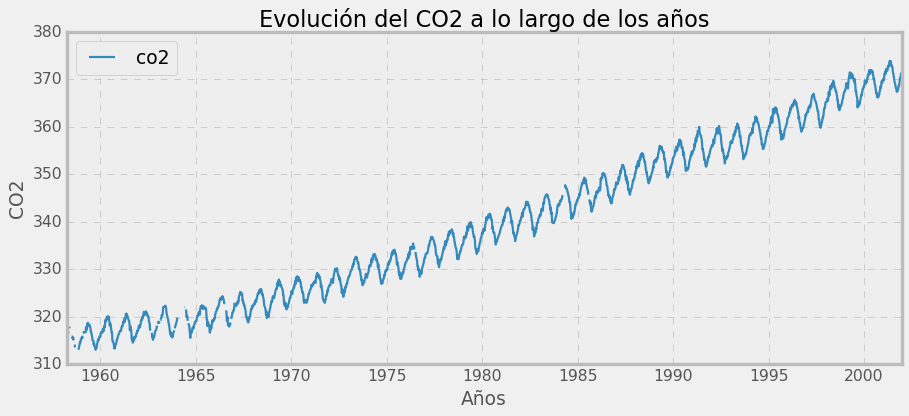

In [128]:
plt.style.use('bmh') # otro formato

ax = co_2.plot(figsize = (12, 5))

ax.set_xlabel('Años')
ax.set_ylabel('CO2')
ax.set_title('Evolución del CO2 a lo largo de los años')
plt.show()

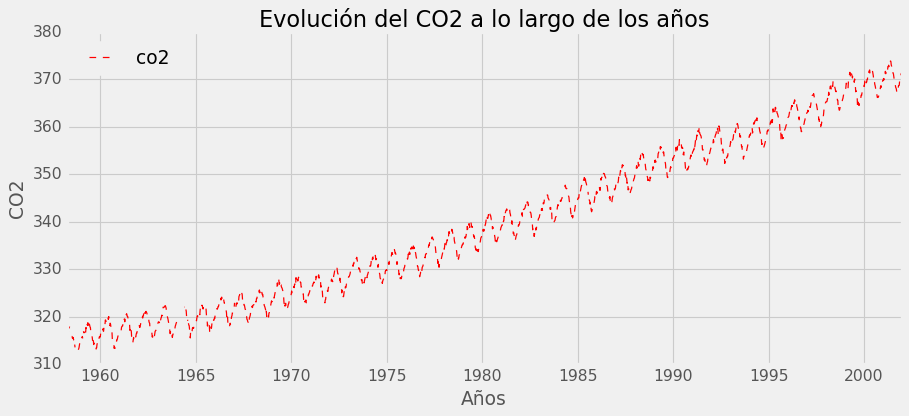

In [26]:
plt.style.use('fivethirtyeight') 

ax = co_2.plot(figsize = (12, 5), linewidth = 1.1, linestyle = '--', color = 'red')

ax.set_xlabel('Años')
ax.set_ylabel('CO2')
ax.set_title('Evolución del CO2 a lo largo de los años')
plt.show()

In [129]:
plt.style.use('default') # Usaremos la version default

Más información:
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## <a id='1.3.'> 1.3. Limpiar tu serie de tiempo </a> 

Es habitual encontrarse con conjuntos de datos en los que faltan valores. Esto es especialmente cierto en el caso de los datos de series temporales, en los que pueden faltar valores si una medición no registra el valor en un momento determinado.

Para contar cuántos valores perdidos tenemos podemos utilizar

missing_values = df.isnull().sum()

In [130]:
# Contamos los valores que faltan en co_2
co_2.isna().sum()
co_2.isnull().sum()

co2    59
dtype: int64

Para llenar los valores perdidos usamos \
df.fillna() \
y especificamos el método
- bfill (backward fill): toma el valor anterior para rellenar el valor que falta 
- ffill (forward fill) : toma el siguiente valor para rellenar el valor que falta

In [138]:
# ¿Cómo manejamos los valores perdidos?
co2_levels = co_2.fillna(method='bfill') # backward fill: toma el valor anterior para rellenar el valor que falta 

In [136]:
co2_levels = co_2.fillna(method='ffill') # forward fill: toma el siguiente valor para rellenar el valor que falta

In [133]:
# Volvemos a contar los valores nulos
co2_levels.isna().sum()

co2    0
dtype: int64

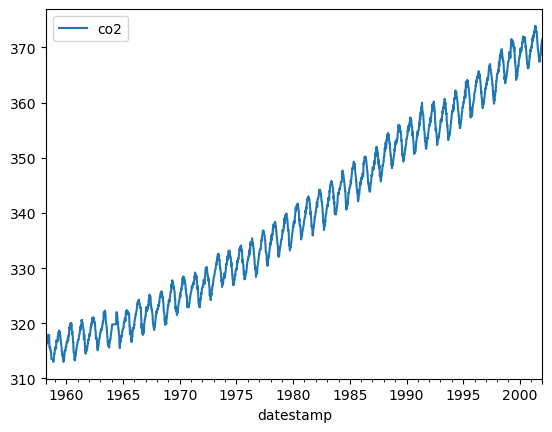

In [137]:
# Ploteamos el nuevo dataframe sin valores nulos
co2_levels.plot()
plt.show()

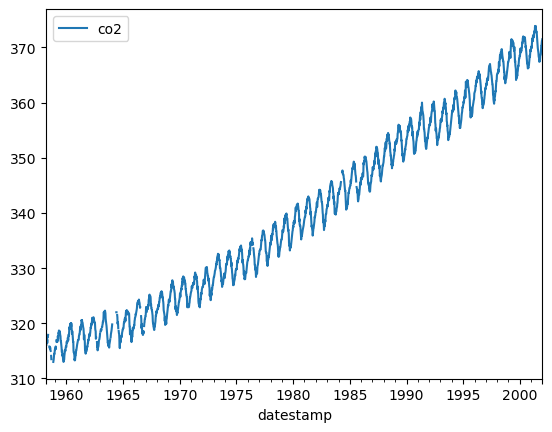

In [135]:
# Podemos ver que el conjunto de datos original todavía tiene valores perdidos
co_2.plot() 
plt.show()

#  <a id='t2'> 2. Customiza tu serie de tiempo </a> 

Primero, repasamos lo que ya hemos visto con otro dataset


In [139]:
discoveries = pd.read_csv('databases\discoveries.csv')

In [140]:
print(discoveries.columns)
print(discoveries.dtypes)

Index(['date', 'Y'], dtype='object')
date    object
Y        int64
dtype: object


In [141]:
discoveries['date'] = pd.to_datetime(discoveries['date'])  # Colocamos date

In [142]:
discoveries = discoveries.set_index('date') # Colocamos date

In [143]:
print(discoveries.index)

DatetimeIndex(['1860-01-01', '1861-01-01', '1862-01-01', '1863-01-01',
               '1864-01-01', '1865-01-01', '1866-01-01', '1867-01-01',
               '1868-01-01', '1869-01-01', '1870-01-01', '1871-01-01',
               '1872-01-01', '1873-01-01', '1874-01-01', '1875-01-01',
               '1876-01-01', '1877-01-01', '1878-01-01', '1879-01-01',
               '1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01', '1890-01-01', '1891-01-01',
               '1892-01-01', '1893-01-01', '1894-01-01', '1895-01-01',
               '1896-01-01', '1897-01-01', '1898-01-01', '1899-01-01',
               '1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01', '1910-01-01', '1911-01-01',
               '1912-01-01', '1913-01-01', '1914-01-01', '1915-01-01',
      

In [144]:
# La cabecera del dataframe
discoveries.head()

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0


In [145]:
# Vemos si tiene valores missing
discoveries.isna().sum()

Y    0
dtype: int64

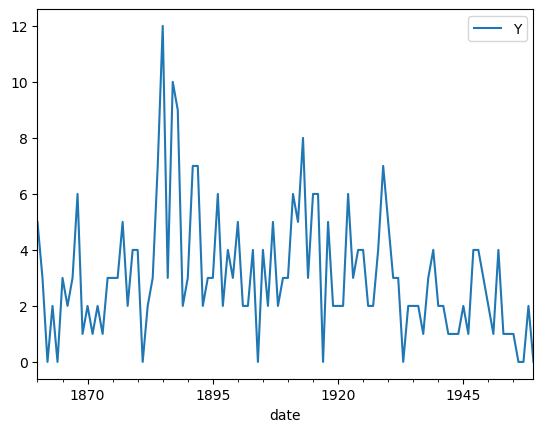

In [146]:
# Un ploteo simple
discoveries.plot()

# Show plot
plt.show()

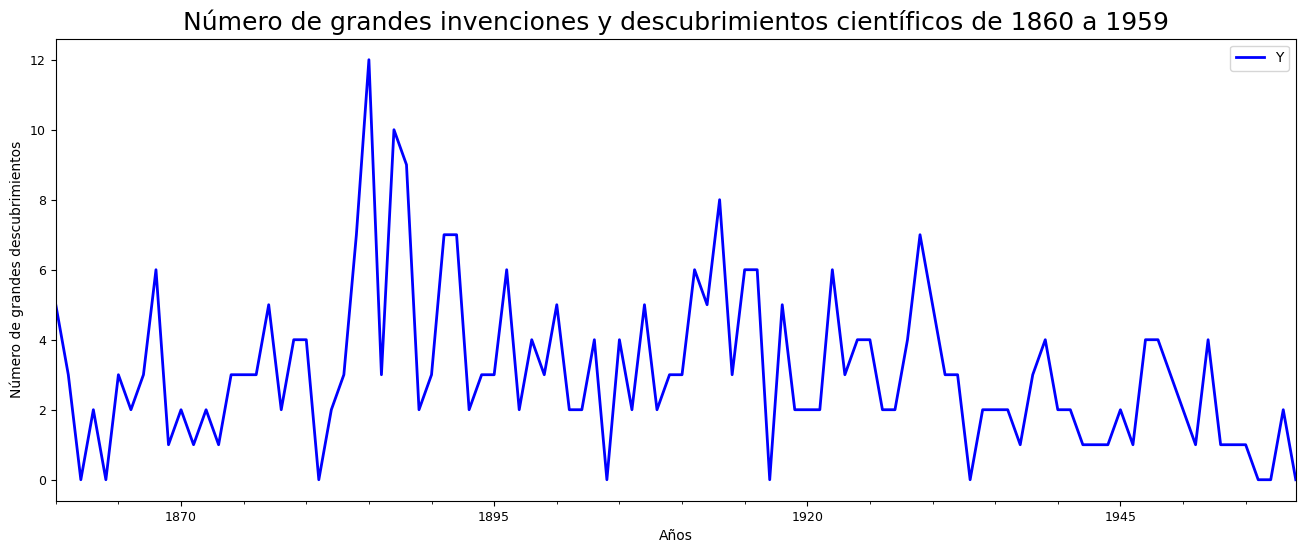

In [147]:
plt.style.use('default')

ax = discoveries.plot(color='blue', figsize=(16, 6), linewidth=2, fontsize=9)

# Especifica el  x-axis
ax.set_xlabel('Años')

# Especifica el  y-axis 
ax.set_ylabel('Número de grandes descubrimientos')

# Añadimos el título
ax.set_title('Número de grandes invenciones y descubrimientos científicos de 1860 a 1959', fontsize='18')

# Mostramos el plot
plt.show()

## <a id='2.1.'> 2.1. Haz un subset de la serie de tiempo </a> 
Sólo es posible si el índice del DataFrame contiene el índice de tipo DateTimeIndex

In [148]:
early_twentieth_century = discoveries['1900':'1945']

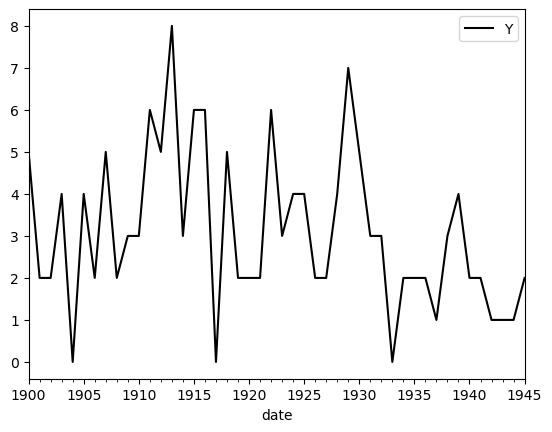

In [149]:
early_twentieth_century.plot(color = 'black')
plt.show()

Volvamos al dataset original de las emisiones de co2

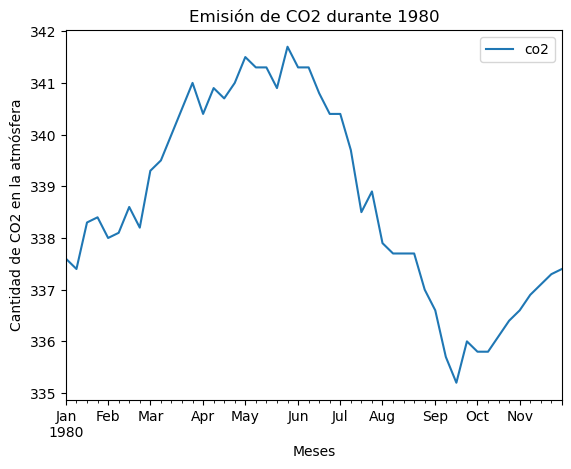

In [150]:
# Podemos hacer subset de algunos meses dentro del año
nineteen_eighty = co_2['1980-01-01':'1980-12-01']

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

plt.show()

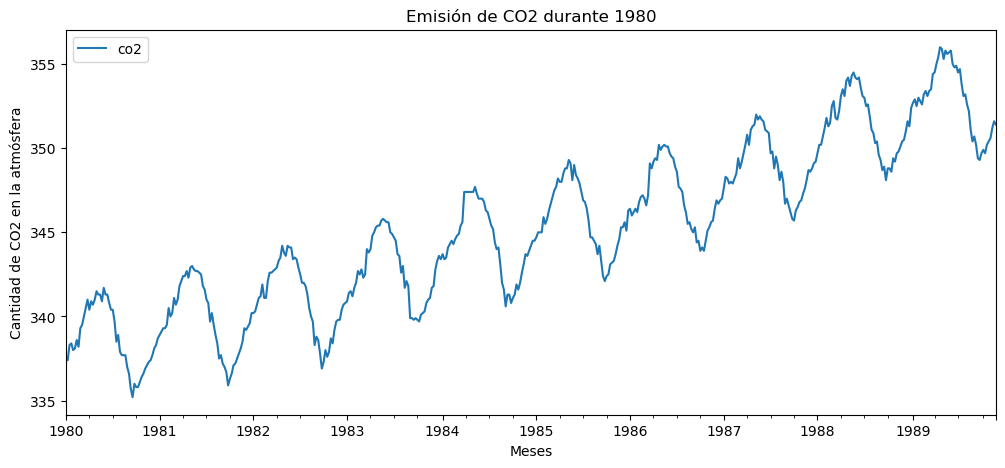

In [151]:
# Hagamos un subset desde el inicio de 1980 hasta 1989
eighties = co2_levels['1980-01-01':'1989-12-01']
ax = eighties.plot(figsize=(12,5)) # ajustamos el tamaño del canva

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

plt.show()

## <a id='2.2.'> 2.2. Añadir líneas en las gráficas </a>  

En ocasiones vamos a querer indicar puntos importantes dentro de nuestro gráfico, nos funciones nos van a ser útiles para ello: axvline y axhline.

- **axvline:** Es útil para resaltar o marcar valores específicos en el eje 'x' de un gráfico, como puntos de referencia, umbrales o eventos importantes. Proporciona una manera efectiva de visualizar y comparar datos en relación con una línea vertical de referencia.
- **ahvline:** Es útil para resaltar o marcar valores específicos en el eje 'y' de un gráfico, como valores de referencia, límites o puntos críticos. Facilita la comparación visual de datos con una línea horizontal de referencia.

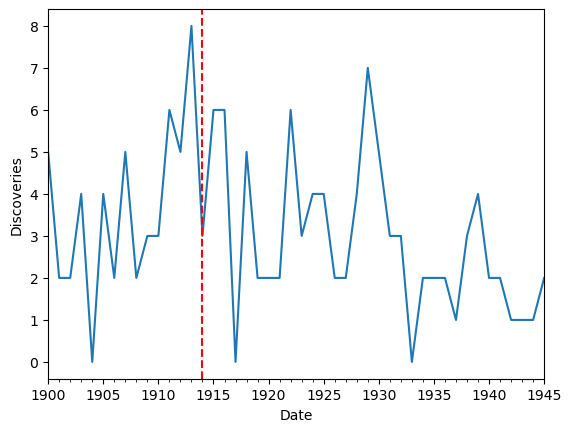

In [47]:
# Utilizamos axvline 
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Date')

ax.set_ylabel('Discoveries')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Podemos indicar eventos importantes

plt.show()

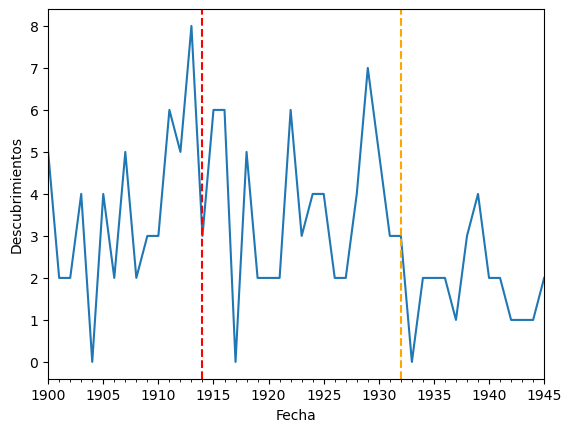

In [48]:
ax = early_twentieth_century.plot(legend = None)
ax.set_xlabel('Fecha')

ax.set_ylabel('Descubrimientos')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Indicamos una fecha histórica

ax.axvline(x = '1932-01-01', color = 'orange', linestyle = '--') # Podemos indicar varias líneas en una sola gráfica

plt.show()

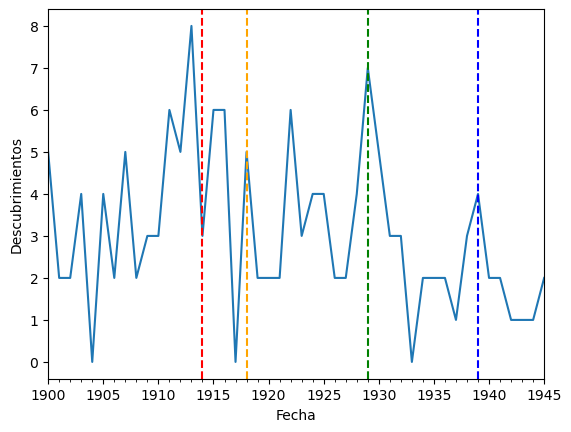

In [153]:
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Fecha')

ax.set_ylabel('Descubrimientos')

fechas_historicas = ['1914-01-01', '1918-01-01', '1929-01-01', '1939-01-01']

colores = ['red', 'orange', 'green', 'blue']

for fecha, color in zip(fechas_historicas, colores): # Zipea la info de fechas históricas y colores
    ax.axvline(x=fecha, color=color, linestyle='--') # Se combina la lista de fechas históricas y de coloresen un formato que puede ser utilizado en un bucle

plt.show()

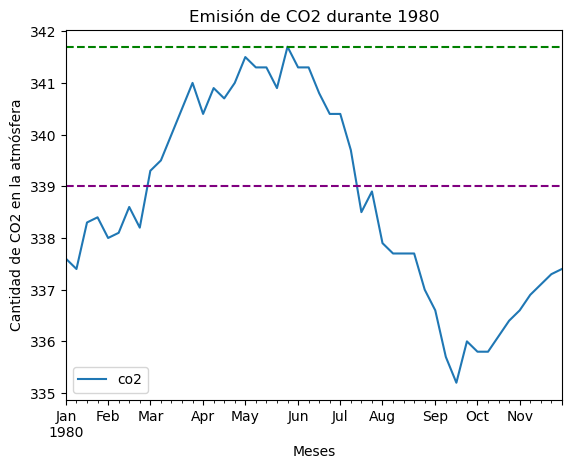

In [50]:
# Podemos añadir líneas horizontales con axhline
nineteen_eighty = co_2['1980-01-01':'1980-12-01']

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 339, color = 'purple', linestyle = '--')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

plt.show()


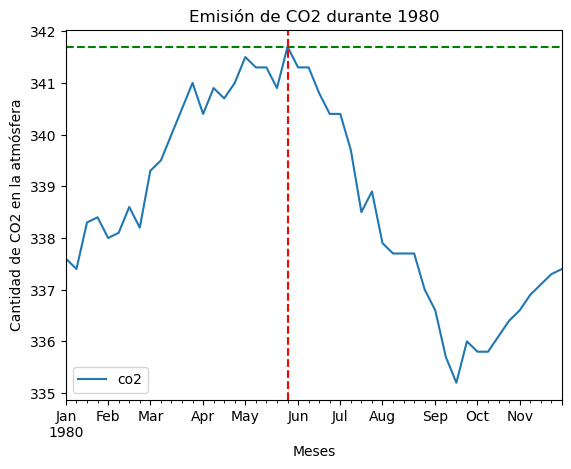

In [51]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')

plt.show()


In [52]:
#nineteen_eighty.min()
#nineteen_eighty[nineteen_eighty['co2'] == 335.2]

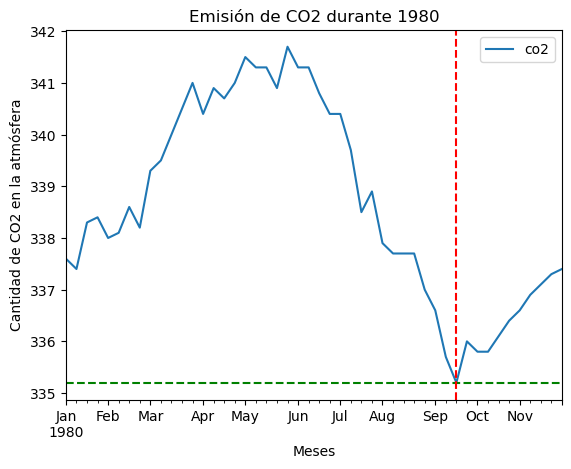

In [53]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')

plt.show()

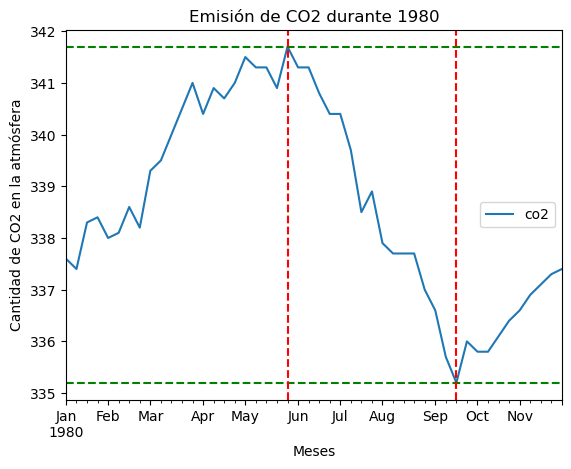

In [154]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')  # year 1980-05-31

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')  # year 1980-09-20

plt.show()

## <a id='2.3.'> 2.3. Sombrear regiones en tu gráfica </a> 

Utilizamos el comando axvspan y axhspan

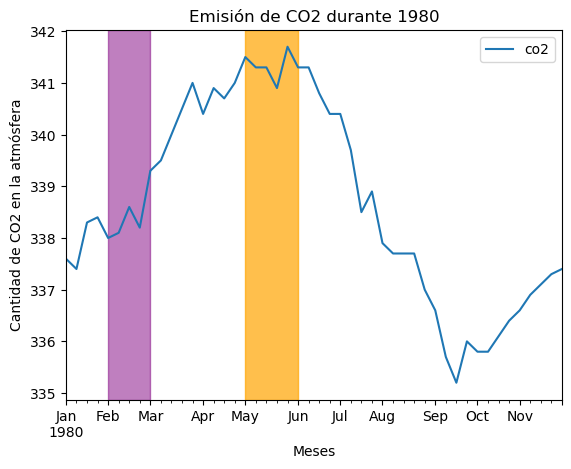

In [159]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

# Podemos sombrear el área desde mayo de 1980 (1980-05-31) hasta septiembre de 1980 (1980-09-20)
ax.axvspan('1980-02-01', '1980-03-01', color = 'purple', alpha = 0.5)

ax.axvspan('1980-05-01', '1980-06-01', color='orange', alpha=0.7)


plt.show()

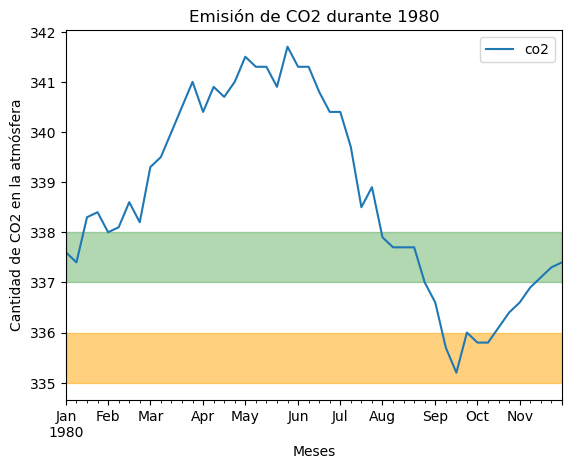

In [160]:
# We can also highlight horizontally from one value to another
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhspan(335, 336, color = 'orange', alpha = 0.5)

ax.axhspan(338, 337, color = 'green', alpha = 0.3) 

plt.show()

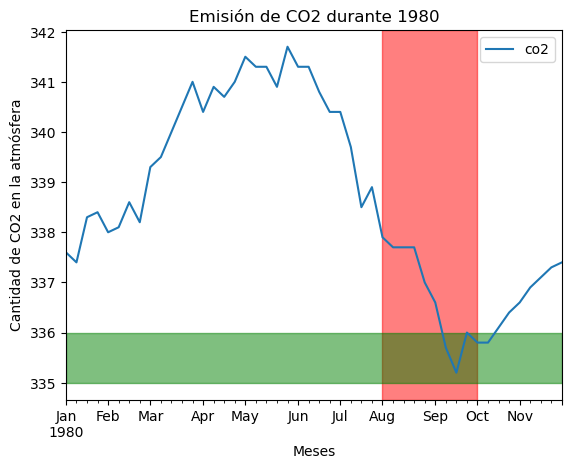

In [162]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axvspan('1980-08-01', '1980-10-01', color = 'red', alpha = 0.5)

ax.axhspan(335, 336, color = 'green', alpha = 0.5)

plt.show()

## <a id='2.4.'> 2.4. Agregar anotaciones </a> 

In [164]:
# ¿Y si queremos resaltar el valor medio? 
mean_nineteen_eighty = nineteen_eighty.mean()

In [59]:
mean_nineteen_eighty.iloc[0]

338.68333333333334

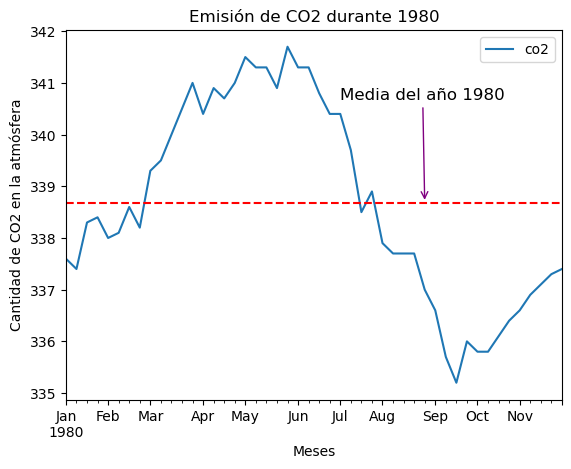

In [166]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = mean_nineteen_eighty.iloc[0], color = 'red', linestyle = '--') 

# Agregar una anotación
ax.annotate('Media del año 1980', xy=('1980-08-30', mean_nineteen_eighty.iloc[0]),
            xytext=('1980-06-30', mean_nineteen_eighty.iloc[0] + 2), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='purple'))

#ax.annotate('Valor medio', xy = ('1980-07-20', 338.68),
            #xytext=('1980-06-30', 340), fontsize = 10, color = 'red', arrowprops = dict(arrowstyle='->', color='black'))


plt.show()

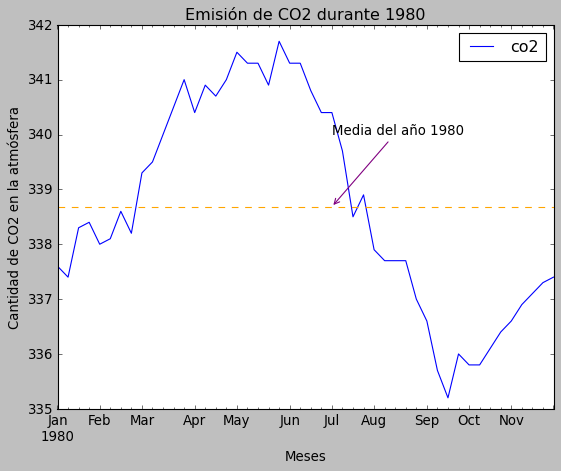

In [201]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.annotate('Media del año 1980', xy=('1980-06-30', 338.6833),
            xytext=('1980-06-30', 340), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='purple')) 

ax.axhline(y = 338.683333, color = 'orange', linestyle = '--') # Otra forma

plt.show()

#  <a id='t3'> 3. Graficar agregados de los datos </a>

## <a id='3.1.'> 3.1. Graficar el rolling average </a>  

La ventana móvil, también conocida como media móvil, es una técnica muy utilizada en el campo del análisis de series temporales.
Puede utilizarse para
- Suavizar los datos (a corto plazo)
- Eliminar valores atípicos
- Destacar tendencias de largo plazo

Podemos obtener la ventana móvil o media móvil de nuestra serie con el comando df.rolling().mean()

In [167]:
# Utilizamos el comando df.rolling().mean()
co2_levels_mean = co2_levels.rolling(window = 52).mean() 

# la ventana móvil depende de cómo trabaje con sus datos
# En este caso seleccionamos ventana = 52 para obtener la media móvil anual (52 semanas en un año)
# Esto corresponde a una ventana móvil anual, suponiendo que sus datos tengan una frecuencia de un punto de datos por semana.
# Por ejemplo, si trabajáramos con datos diarios, especificaríamos ventana = 7 para obtener la media móvil semanal


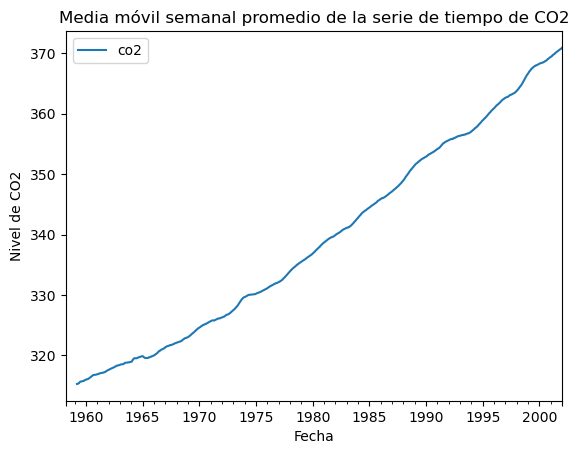

In [170]:
# Graficando la media móvil podemos ver el ciclo o tendencia a largo plazo de la serie temporal
ax = co2_levels_mean.plot()

ax.set_xlabel('Fecha')

ax.set_ylabel('Nivel de CO2')

ax.set_title('Media móvil semanal promedio de la serie de tiempo de CO2')

plt.show()

La media móvil es útil para suavizar las fluctuaciones de los datos y obtener una visión más clara de la tendencia general. Resulta especialmente útil para identificar patrones a largo plazo y reducir el ruido en los datos de series temporales. Es especialmente útil cuando la serie temporal contiene mucho ruido o valores atípicos.


El parámetro window debe establecerse en función de la desagregación de la serie temporal. Por ejemplo, si la serie contiene datos diarios y busca valores móviles a lo largo de todo un año, debe especificar el parámetro window=365. Además, es fácil obtener valores móviles para otras métricas, como la desviación estándar (.std()) o la varianza (.var()).

In [171]:
# Calcula la media móvil de 52 semanas 
ma = co2_levels.rolling(window = 52).mean()

# Calcula la desviación estándar móvil de 52 semanas del DataFrame co2_levels
mstd = co2_levels.rolling(window=52).std()

In [172]:
# Añade la columna del límite superior al DataFrame MA
ma['upper'] = ma['co2'] + (2 * mstd['co2'])  # mean + (2 * rolling standard deviation)

# Añade la columna del límite inferior al DataFrame MA
ma['lower'] = ma['co2'] - (2 * mstd['co2']) # mean - (2 * rolling standard deviation)

In [66]:
ma

,co2,upper,lower
datestamp,,,
1958-03-29,NaN,NaN,NaN
1958-04-05,NaN,NaN,NaN
1958-04-12,NaN,NaN,NaN
1958-04-19,NaN,NaN,NaN
1958-04-26,NaN,NaN,NaN
...,...,...,...
2001-12-01,370.738462,374.602860,366.874063
2001-12-08,370.761538,374.612518,366.910559
2001-12-15,370.798077,374.628500,366.967654


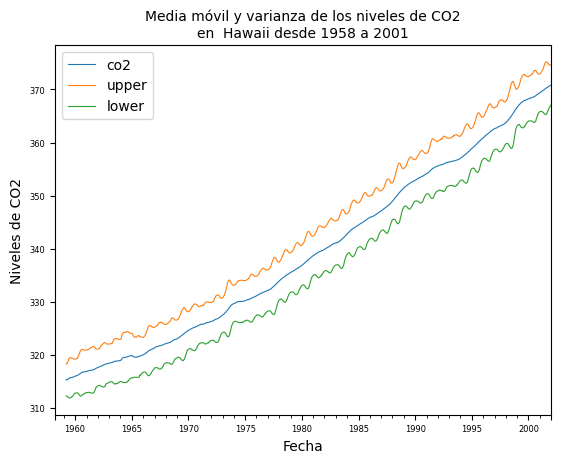

In [173]:
# Graficamos el Dataframe MA
ax = ma.plot(linewidth=0.8, fontsize=6)

ax.set_xlabel('Fecha', fontsize=10)

ax.set_ylabel('Niveles de CO2', fontsize=10)

ax.set_title('Media móvil y varianza de los niveles de CO2\nen  Hawaii desde 1958 a 2001', fontsize=10)

plt.show()

## <a id='3.2.'> 3.2. Graficar datos agregados por año </a>

En ocasiones, vamos a querer agregar los datos de una serie temporal en subconjuntos más pequeños para obtener información más detallada o identificar patrones estacionales.
Después de agrupar los datos mensuales y calcular el promedio de CO2 para cada mes, generamos un gráfico que muestra claramente la tendencia estacional en los niveles de CO2 a lo largo del año.

In [174]:
# Obtenemos el índice de los meses del año
index_month = co2_levels.index.month 
index_month 

Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
       ...
       10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype='int32', name='datestamp', length=2284)

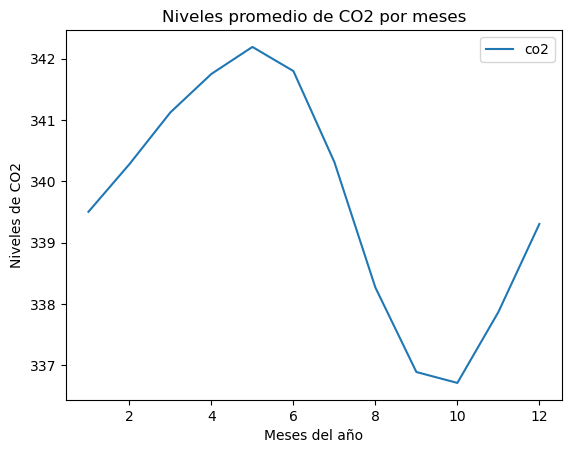

In [175]:
# Agrupamos por meses, obtenemos la media y lo graficamos
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

co2_levels_by_month.plot()

plt.title('Niveles promedio de CO2 por meses')

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.show()

# Obtenemos un gráfico similar al de 1980, pero suavizado 

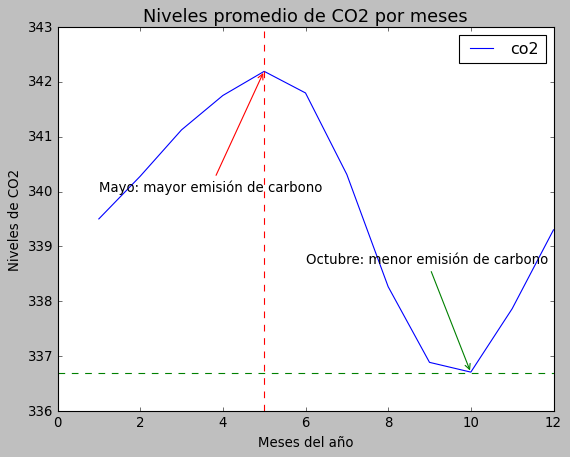

In [176]:
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

plt.style.use('classic')

co2_levels_by_month.plot(figsize = (8, 6))

plt.title('Niveles promedio de CO2 por meses', fontsize = 16)

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.axvline(x = 5, linestyle = '--', color = 'red')

plt.annotate('Octubre: menor emisión de carbono', xy=(10, 336.7),
             xytext=(6, 338.6833), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate('Mayo: mayor emisión de carbono', xy=(5, 342.2),
             xytext=(1, 340), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.axhline(y = 336.7, linestyle = '--',  color = 'green')

plt.show()

#  <a id='t4'> 4. Graficar estadísticas y sintetizar la información </a>
Si bien graficar y realizar anotaciones a los datos de series de tiempo es útil para compartir información, también es fundamental que recopile estadísticas de la serie de tiempo con la que estamos trabajando. Así podremos compartir y discutir las propiedades estadísticas de sus datos, lo cual puede apoyar a los gráficos que generemos y a las hipótesis que deseeamos comunicar.

Podemos usar df.describe() para obtener las principales estadísticas descriptivas

In [177]:
co_2.describe() # Principales estadísticas del dataframe

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [178]:
co2_levels.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [179]:
discoveries.describe()

,Y
count,100.000000
mean,3.100000
std,2.254065
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [72]:
# Imprimimos las principales estadísticas de co2_levels
print(co2_levels.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


In [180]:
co2_levels.mean()

co2    339.65775
dtype: float64

In [181]:
co2_levels.std()

co2    17.100899
dtype: float64

In [73]:
# Imprimimos los mínimos de la columna co2 en el DataFrame co2_levels
print(co2_levels.min())

co2    313.0
dtype: float64


In [74]:
# Imprimimos los máximos de la columna co2 en el DataFrame co2_levels
print(co2_levels.max())

co2    373.9
dtype: float64


## <a id='4.1.'> 4.1. Graficar boxplots (gráficos de caja) </a>
Los boxplots muestran la mediana, los cuartiles y la variabilidad de los datos, lo que facilita la identificación de tendencias centrales y valores atípicos en una distribución. Estos gráficos son particularmente útiles para comparar múltiples distribuciones de datos o identificar patrones y diferencias en un solo vistazo.

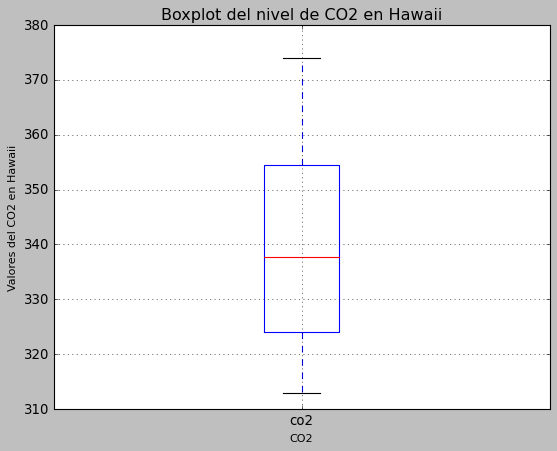

In [185]:
plt.style.use('classic')

# Generamos el boxplot
ax = co2_levels.boxplot()

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Valores del CO2 en Hawaii', fontsize=10)
ax.set_title('Boxplot del nivel de CO2 en Hawaii')
plt.show()

El boxplot está destacando características clave como la mediana, los cuartiles y los valores atípicos. Las líneas que se extienden en paralelo desde las cajas se denominan comúnmente "bigotes" o "whiskers" en inglés, y se utilizan para indicar la variabilidad fuera de los cuartiles superior (que es el percentil del 75%) e inferior (que es el percentil del 25%), es decir, los valores atípicos.

Text(0.5, 1.0, 'Boxplot del nivel de CO2 en Hawaii')

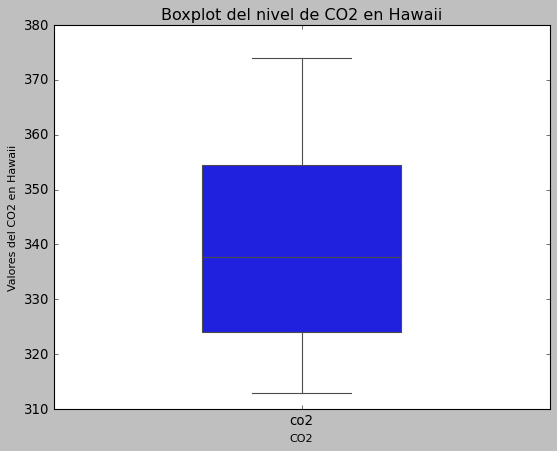

In [191]:
# También se puede realizar utilizando seaborn
plt.figure(figsize=(8, 6))

sns.boxplot(co2_levels, width=0.4)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('Valores del CO2 en Hawaii', fontsize=10)

plt.title('Boxplot del nivel de CO2 en Hawaii')


## <a id='4.2.'> 4.2. Graficar histogramas </a>

Los histogramas son una representación visual efectiva de la distribución de datos en un conjunto, permitiendo identificar rápidamente la concentración de valores en diferentes intervalos o "bins". Al mostrar la frecuencia con la que ocurren los valores en cada bin, los histogramas destacan la tendencia central de los datos y la forma general de su distribución, ya sea simétrica, sesgada o multimodal. 


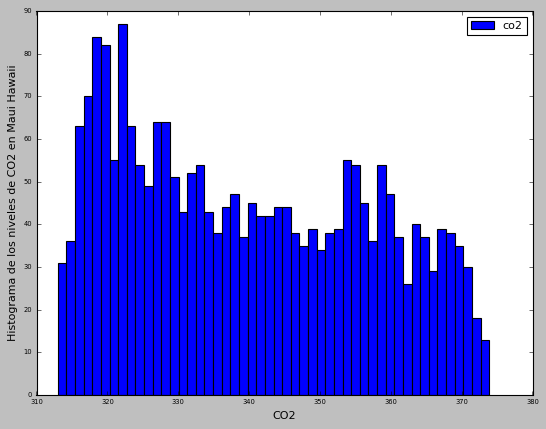

In [196]:
# Generamos un histograma
ax = co2_levels.plot(kind='hist', bins = 50, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

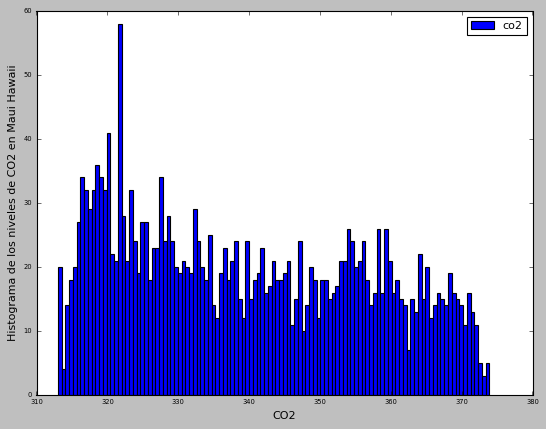

In [197]:
ax = co2_levels.plot(kind='hist', bins = 115, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## <a id='4.3.'> 4.3. Crear gráficos de densidad </a>
Los gráficos de densidad ofrecen una perspectiva detallada de la distribución de datos al visualizar la concentración de valores a lo largo de una variable continua. Nos permiten observar las tendencias centrales y las formas de distribución con mayor suavidad y precisión que los histogramas. 
Al presentar la densidad de probabilidad de los datos, los gráficos de densidad resaltan la presencia de múltiples modas o picos, la simetría o asimetría en la distribución, y las áreas de alta concentración de datos. 

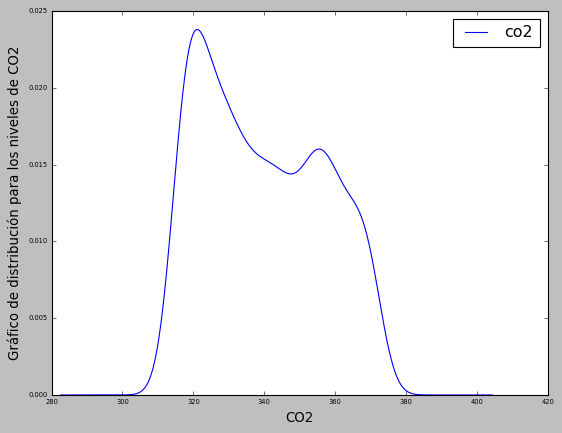

In [198]:
ax = co2_levels.plot(kind='density', linewidth = 1, fontsize = 6)

ax.set_xlabel('CO2')

ax.set_ylabel('Gráfico de distribución para los niveles de CO2')

plt.show()

#  <a id='t5'> 5. Descomponer las series de tiempo </a>
Las series de tiempo usualmente se descomponen en un componente estacional (seasonal), un componente tendencial (trend) y uno irregular (noise). Anteriormente vimos una manera de separar la tendencia de largo plazo por medio del rolling window o de graficar  el componente estacional agregando los datos por año. Ahora veremos otra manera de descomponer las series en estas tres partes.

La "estacionalidad" se refiere a patrones cíclicos y recurrentes en los datos, que pueden deberse a factores estacionales, como las estaciones del año o eventos regulares. La "tendencia" muestra la dirección general de los datos a lo largo del tiempo, revelando si los valores tienden a aumentar o disminuir con el tiempo. Por último, el "ruido" representa la variabilidad aleatoria o irregular que no se puede atribuir a la estacionalidad ni a la tendencia, y a menudo se considera como un componente aleatorio en los datos.

Utilizaremos la función seasonal_decompose() de statsmodels.api para realizar la descomposición


$y_t = t_t + c_t + s_t + e_t$

In [207]:
# Importamos statsmodels que nos será útil para la descomposición 
import statsmodels.api as sm

In [208]:
descomposicion = sm.tsa.seasonal_decompose(co2_levels)

In [209]:
print(dir(descomposicion))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']


In [210]:
descomp_trend = descomposicion.trend

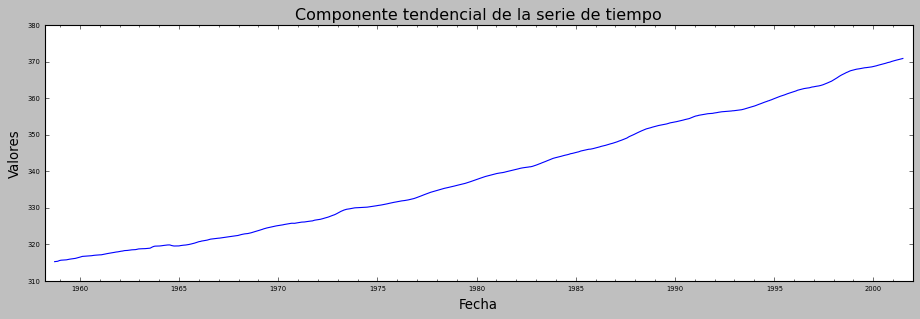

In [84]:
ax = descomp_trend.plot(figsize = (14,4), fontsize=6)
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente tendencial de la serie de tiempo')
plt.show()

In [85]:
descomp_seasonal = descomposicion.seasonal

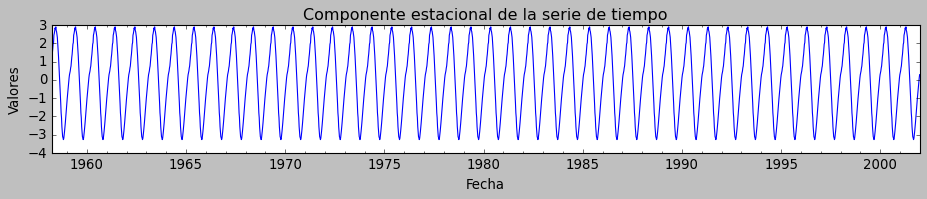

In [86]:
ax = descomp_seasonal.plot(figsize = (14,2))
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente estacional de la serie de tiempo')
plt.show()

In [87]:
descomp_resid = descomposicion.resid

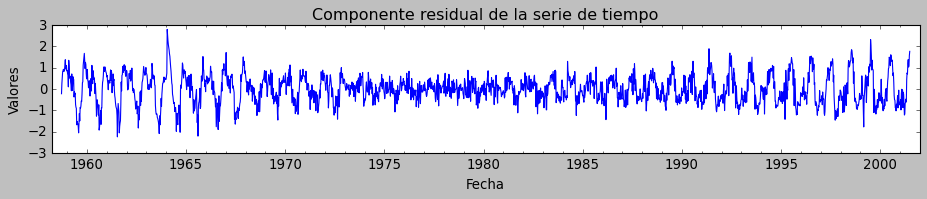

In [88]:
ax = descomp_resid.plot(figsize = (14,2))
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente residual de la serie de tiempo')
plt.show()

#  <a id='t6'> 6. Graficar múltiples series de tiempo </a>

plt.subplots() en Matplotlib permite crear una figura y uno o más ejes (subgráficos) dentro de esa figura. El número de filas y columnas de subgráficos se controla mediante los argumentos de la función. Por ejemplo, plt.subplots(2,2) crea un gráfico con dos filas y dos columnas, lo cual nos permitiría tener cuatro gráficas en un canva. Esto es útil para crear visualizaciones múltiples o comparar diferentes conjuntos de datos en una sola figura, todo controlado desde la figura principal y sus ejes secundarios.

Es posible que queramos graficar datos que comparten las mismas fechas en un mismo gráfico para identificar correlaciones o patrones en múltiples series de datos. Sin embargo, cuando los datos tienen escalas muy diferentes, la representación conjunta puede dificultar la interpretación. 

En esos casos, podemos utilizar ax.twinx() para utilizar el mismo eje para trazar dos series de tiempo diferentes

Esta función nos permite superponer dos ejes yuxtapuestos en un solo gráfico, cada uno con su propia escala y rango de valores, lo que facilita la comparación de series de datos con unidades o magnitudes distintas. 

In [211]:
cbi_ipc = pd.read_excel('databases\cbi_ipc.xlsx') # Leemos la base de datos

In [212]:
cbi_ipc['Year'] = pd.to_datetime(cbi_ipc['Year'], format = "%Y") # Realizamos la transformación del database como vimos al inicio

In [213]:
cbi_ipc = cbi_ipc.set_index('Year') # Creamos el índice DataTime

In [214]:
cbi_ipc.index

DatetimeIndex(['1980-01-01', '1980-01-01', '1980-01-01', '1980-01-01',
               '1981-01-01', '1981-01-01', '1981-01-01', '1981-01-01',
               '1982-01-01', '1982-01-01',
               ...
               '2018-01-01', '2018-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', length=164, freq=None)

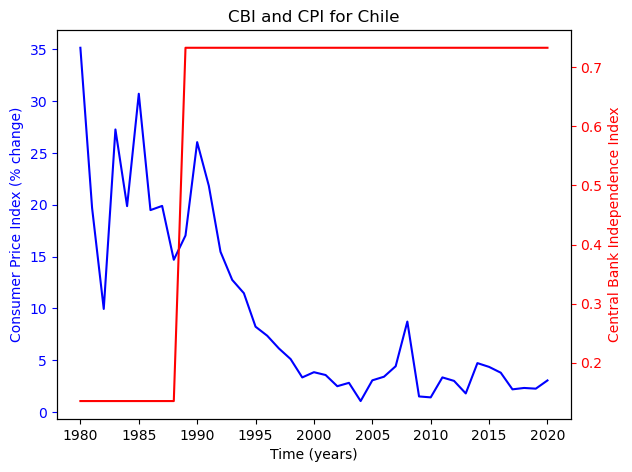

In [218]:
plt.style.use('default')

fig, ax = plt.subplots()

ax.set_title('CBI and CPI for Chile')

ax.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, linewidth = 1.5, color = 'blue')

ax.set_xlabel('Time (years)')

ax.set_ylabel('Consumer Price Index (% change)', color = 'blue')

ax.tick_params('y', colors = 'blue')

ax2 = ax.twinx()

ax2.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, linewidth = 1.5, color = 'red')

ax2.set_xlabel('Time (years)')

ax2.set_ylabel('Central Bank Independence Index', color = 'red')

ax2.tick_params('y', colors = 'red')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Chile.png")

plt.show()

In [219]:
def graficar_seriesdetiempo(axes, x, y, color, xlabel, ylabel):
    
    ''' Esta función grafica una serie de tiempo, toma el axes, los valores del eje x, los valores del el eje y, el color y los nombres de los ejes
        
        Argumentos:
        
        axes: El axes con el que se está trabajando
        x: Fechas del eje x (usualmente va el índice)
        y: Valores del eje y
        color: Color del axes
        xlabel: Nombre del eje x
        ylabel: Nombre del eje y
    
    '''
    
    axes.plot(x, y, color = color)
    
    axes.set_xlabel(xlabel)
    
    axes.set_ylabel(ylabel, color = color)
    
    axes.tick_params(axis = 'y', colors = color)
    

    

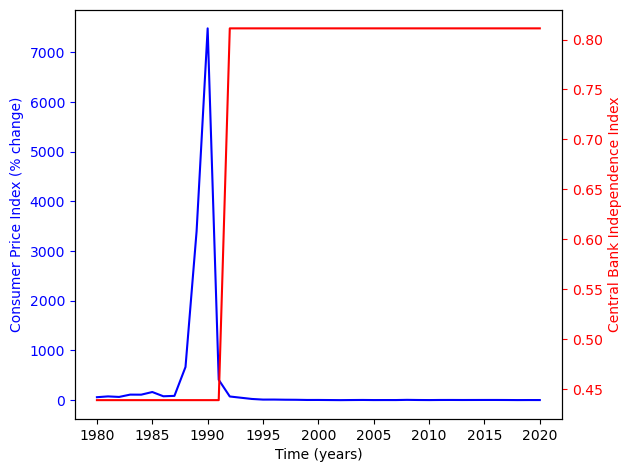

In [220]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Peru.png")

plt.show()

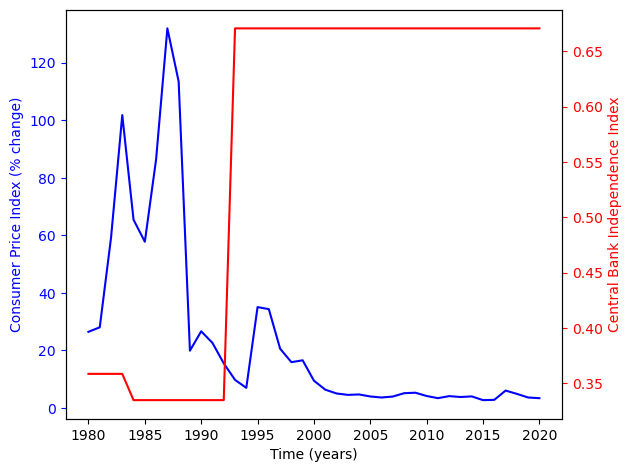

In [221]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Mexico.png")

plt.show()

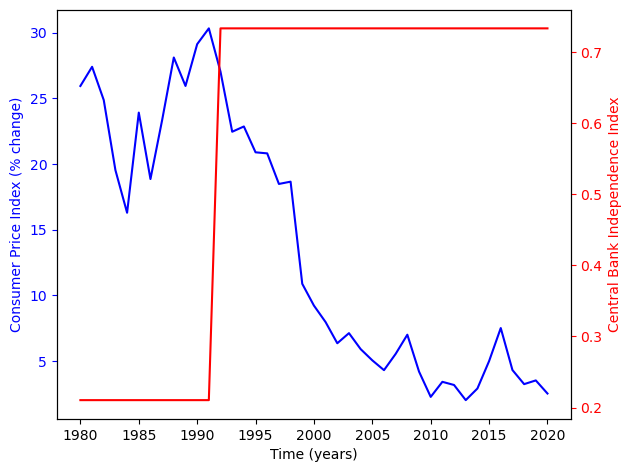

In [222]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Colombia.png")

plt.show()

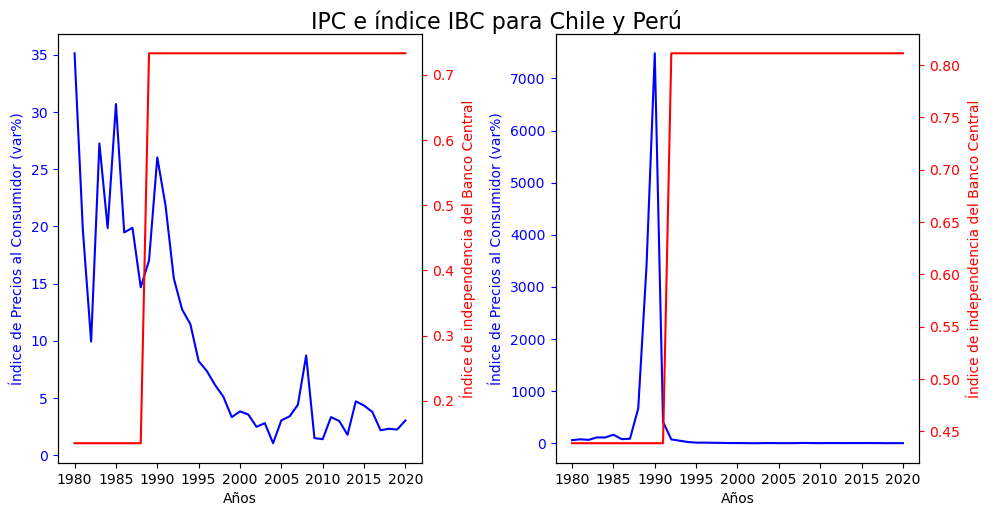

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

graficar_seriesdetiempo(axs[0], cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, 
                        "blue", 'Años', 'Índice de Precios al Consumidor (var%)')

ax1 = axs[0].twinx()

graficar_seriesdetiempo(ax1, cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, 
                        "red", 'Años', 'Índice de independencia del Banco Central')

# Ahora para Perú

graficar_seriesdetiempo(axs[1], cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "blue", 'Años', 'Índice de Precios al Consumidor (var%)')

ax2 = axs[1].twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "red", 'Años', 'Índice de independencia del Banco Central')

fig.tight_layout(pad=1.0)
fig.suptitle('IPC e índice IBC para Chile y Perú', y=1.02 , fontsize=16)

plt.savefig("images\IPC y CBI para Chile y Perú.png", bbox_inches='tight', dpi=300)